In [1]:
import matplotlib.pyplot as plt
import numpy as np

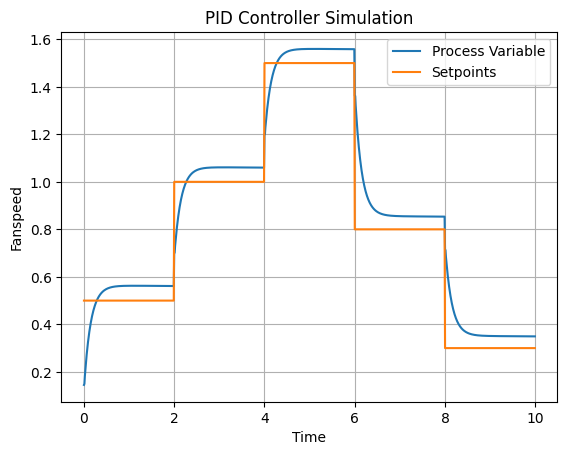

In [58]:
class PIDSimulation:
    def __init__(self, Kp, Ki, Kd, bias):
        self.Kp = Kp  # Proportional gain
        self.Ki = Ki  # Integral gain
        self.Kd = Kd  # Derivative gain
        self.bias = bias  # Steady-state offset

        self.setpoints = [0.5, 1.0, 1.5, 0.8, 0.3]  # List of desired setpoints
        self.integral = 0.0  # Integral term accumulation
        self.previous_error = 0.0  # Previous error for derivative term calculation

    def calculate_control_output(self, error, dt):
        self.integral += error * dt  # Accumulate the error over time
        derivative = (error - self.previous_error) / dt  # Calculate the derivative term
        output = (self.Kp * error + self.Ki * self.integral + self.Kd * derivative) + self.bias
        self.previous_error = error  # Update the previous error for the next iteration
        return output

    def simulate(self, duration, dt):
        num_steps = int(duration / dt)
        time = np.arange(0, duration, dt)
        setpoints = np.repeat(self.setpoints, num_steps // len(self.setpoints))
        process_variable = np.zeros(num_steps)
        control_output = np.zeros(num_steps)

        for i in range(num_steps):
            error = setpoints[i] - process_variable[i-1]  # Calculate the error
            control_output[i] = self.calculate_control_output(error, dt)  # Calculate the control output
            process_variable[i] = process_variable[i-1] + control_output[i] * dt  # Update the process variable

        plt.plot(time, process_variable, label='Process Variable')
        plt.plot(time, setpoints, label='Setpoints')
        plt.xlabel('Time')
        plt.ylabel('Fanspeed')
        plt.title('PID Controller Simulation')
        plt.legend()
        plt.grid(True)
        plt.show()

pid_sim = PIDSimulation(Kp=8, Ki=0.2, Kd=0.2, bias=0.5)
pid_sim.simulate(duration=10.0, dt=0.01)